# 데이터셋을 가져오는 방법


### 1. 파일을 직접 불러오기 (로컬 파일 또는 클라우드 저장소)

In [ ]:
import pandas as pd 
data = pd.read_csv('file.csv')
# pandas, numpy, scipy, h5py 등 다양한 파이썬 라이브러리를 사용하여 CSV, HDF5, Excel, 이미지 등 파일 형식의 데이터를 불러옵니다.

### 2. 온라인 데이터셋 (예: 웹 URL)

In [ ]:
import requests
import pandas as pd

url = "http://example.com/data.csv"
response = requests.get(url)
open('data.csv', 'wb').write(response.content)
data = pd.read_csv('data.csv')
# Kaggle, UCI Machine Learning Repository 등에서 데이터를 직접 다운로드하거나 URL로 연결할 수 있습니다.

### 3. 클라우드 서비스에서 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/My Drive/data.csv')
# Google Colab에서는 구글 드라이브와 연동하여 데이터를 불러오거나, AWS S3, Google Cloud Storage, Azure 등의 클라우드 스토리지에서 데이터를 가져올 수 있습니다.

### 4. API를 통해 데이터 가져오기

많은 데이터 플랫폼이나 오픈 데이터베이스에서는 API를 통해 데이터를 제공하며, 파이썬의 requests 또는 urllib 라이브러리로 이를 가져올 수 있습니다.

### 5. 데이터셋 라이브러리 사용
scikit-learn, TensorFlow 또는 torchvision 같은 머신러닝 프레임워크에는 미리 준비된 학습 데이터셋이 포함되어 있습니다. 이런 데이터셋은 코드 몇 줄로 쉽게 불러올 수 있습니다.

In [1]:
from sklearn.datasets import load_iris
data = load_iris()
# scikit-learn, TensorFlow 또는 torchvision 같은 머신러닝 프레임워크에는 미리 준비된 학습 데이터셋이 포함되어 있습니다. 이런 데이터셋은 코드 몇 줄로 쉽게 불러올 수 있습니다.

In [ ]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

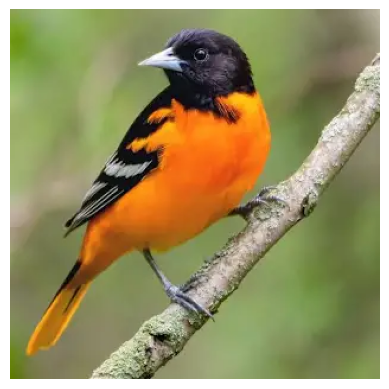

(64, 64, 4)


In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 로컬 이미지 파일 불러오기 (이미지 경로를 실제 파일 이름으로 변경)
img = Image.open('birds.png')  # 저장한 이미지의 이름과 경로로 수정

# 이미지 시각화
plt.imshow(img)
plt.axis('off')
plt.show()

# 이미지를 넘파이 배열로 변환 (크기 변경: 예시로 (64, 64)로 맞춤)
img = img.resize((64, 64))
img_array = np.array(img)

# 이미지의 크기 확인
print(img_array.shape)

In [4]:
# 폴더를 순회해 이미지 찾기
import os
from PIL import Image
import numpy as np

# 데이터셋 폴더 경로 설정
dataset_dir = 'pyquest/images'

# 이미지 크기 설정
img_size = (64, 64)

# 이미지 데이터를 담을 리스트
dataset = []

# 폴더를 순회하며 이미지 파일을 불러옴
for root, dirs, files in os.walk(dataset_dir):
    print(f"Searching in directory: {root}")  # 현재 경로를 출력하여 디버깅
    for file in files:
        if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"):
            img_path = os.path.join(root, file)
            print(f"Found image file: {img_path}")  # 이미지 경로 출력
            try:
                img = Image.open(img_path)
                img = img.resize(img_size)
                img_array = np.array(img)
                dataset.append(img_array)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

# 데이터셋을 넘파이 배열로 변환
dataset = np.array(dataset)

# 데이터셋 크기 출력
print(f"Dataset shape: {dataset.shape}")


Dataset shape: (0,)


In [ ]:
# 이미지에서 얼굴을 인식해 자동으로 분류
import os
import cv2  # OpenCV 라이브러리
from PIL import Image
import numpy as np

# 데이터셋 폴더 경로 설정
dataset_dir = "D:\\OneDrive\\Documents\\python\\pyquest\\images"

# 이미지 크기 설정
img_size = (64, 64)

# 이미지 데이터를 담을 리스트
dataset = []

# OpenCV에서 제공하는 Haar Cascade 파일 경로
# haarcascade_frontalface_default.xml은 얼굴 검출용 모델입니다.
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 이미지 파일을 순회하며 불러옴
for file in os.listdir(dataset_dir):
    if file.endswith(".jpg"):  # 모든 파일이 jpg라면 확장자 체크 간소화
        img_path = os.path.join(dataset_dir, file)
        print(f"Processing image: {img_path}")  # 이미지 경로 출력
        try:
            # OpenCV로 이미지를 그레이스케일로 불러옴 (얼굴 검출은 그레이스케일에서 수행)
            img = cv2.imread(img_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # 얼굴 검출
            faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
            
            # 얼굴이 하나 이상 검출된 경우만 데이터를 추가
            if len(faces) > 0:
                # 이미지 크기를 64x64로 리사이즈 후 넘파이 배열로 변환
                pil_img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                pil_img = pil_img.resize(img_size)
                img_array = np.array(pil_img)
                dataset.append(img_array)
                print(f"Face detected, added image: {img_path}")
            else:
                print(f"No face detected in image: {img_path}")
        
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

# 데이터셋을 넘파이 배열로 변환
dataset = np.array(dataset)

print(f"Dataset shape: {dataset.shape}")  # 데이터셋 크기 출력

### 1. MTCNN (Multi-task Cascaded Convolutional Networks)
MTCNN은 딥러닝 기반 얼굴 검출 모델로, 작은 얼굴을 포함한 다양한 크기의 얼굴을 매우 잘 검출합니다. <br>
Python에서 MTCNN 라이브러리를 사용하면 비교적 쉽게 적용할 수 있습니다.

In [ ]:
from mtcnn import MTCNN
import cv2
import numpy as np
from PIL import Image

detector = MTCNN()

# 이미지 파일 불러오기 (cv2 또는 PIL로 불러올 수 있습니다)
img_path = "your_image_path.jpg"
img = cv2.imread(img_path)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 얼굴 검출
faces = detector.detect_faces(rgb_img)

# 얼굴이 검출된 경우에만 데이터셋에 추가
if faces:
    pil_img = Image.fromarray(rgb_img)
    pil_img = pil_img.resize((64, 64))
    img_array = np.array(pil_img)
    dataset.append(img_array)
    print(f"Face detected and added: {img_path}")
else:
    print(f"No face detected: {img_path}")

### 2. 딥러닝 기반 SSD (Single Shot MultiBox Detector)
SSD는 객체 검출에 사용되는 모델로, 얼굴 검출에 매우 강력한 성능을 보여줍니다. 특히 OpenCV에서 DNN 모듈을 이용하여 SSD를 간단히 사용할 수 있습니다.

In [3]:
import cv2
import numpy as np

# 사전 학습된 모델과 구성 파일 경로
model_path = 'deploy.prototxt'
weights_path = 'res10_300x300_ssd_iter_140000.caffemodel'

# DNN 네트워크 로드
net = cv2.dnn.readNetFromCaffe(model_path, weights_path)

# 이미지 불러오기
img_path = "your_image_path.jpg"
img = cv2.imread(img_path)
h, w = img.shape[:2]

# 입력 이미지 준비
blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

# 얼굴 검출 수행
net.setInput(blob)
detections = net.forward()

# 검출된 얼굴 중 신뢰도 0.5 이상인 얼굴만 처리
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.5:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # 얼굴을 포함하는 경우 이미지 추가
        face_img = img[startY:endY, startX:endX]
        face_img = cv2.resize(face_img, (64, 64))
        img_array = np.array(face_img)
        dataset.append(img_array)
        print(f"Face detected and added: {img_path}")

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\caffe\caffe_io.cpp:1126: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "deploy.prototxt" in function 'cv::dnn::ReadProtoFromTextFile'


# 훈련 세트와 테스트 세트로 나눔

In [7]:
from sklearn.model_selection import train_test_split

# Dataset은 이미 넘파이 배열로 준비되어 있다고 가정
# X는 이미지 데이터, Y는 레이블 데이터 (예: 1: 다현, 0: 다른 사진)라고 가정할 때
# 여기서는 Y 값을 임의로 설정 (모든 이미지가 다현이므로 일단 1로 처리)
X = dataset  # 이미지 데이터
Y = np.ones(len(dataset))  # 레이블은 모두 '다현'으로 설정

# 데이터를 훈련 세트와 테스트 세트로 나눔 (80% 훈련, 20% 테스트)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (133, 64, 64, 3)
Test set shape: (34, 64, 64, 3)


## 데이터 정규화
### 이미지는 보통 0~255사이의 값을 가진다. <br>
### 신경망에 데이터를 입력할 때는 일반적으로 모든 값을 0~1사이의 값으로 정규화 한다.

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## 모델 구축
### keras 라이브러리의 TensorFlow 백엔드를 이용한 간단한 CNN 예시

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [9]:
# 모델 생성
model = Sequential()

In [10]:
# 입력 레이어: 64x64 크기의 이미지, 3개의 채널(RGB)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
# 두 번째 합성곱 레이어
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
# 평탄화 (Flatten) 레이어
model.add(Flatten())

In [13]:
# 완전 연결층(Dense Layer)
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 이진 분류를 위해 sigmoid 사용

In [14]:
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# 모델 학습
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

In [11]:
# 필요한 라이브러리 임포트
import os
import cv2
import h5py
import numpy as np
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split

# GPU 사용 가능한지 확인
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# 데이터셋 폴더 경로 설정
dataset_dir = r"D:\OneDrive\Documents\python\pyquest\images"

# 이미지 크기 설정
img_size = (64, 64)

# 이미지 데이터를 담을 리스트
dataset = []
labels = []

# SSD 모델을 위한 사전 학습된 파일 경로
# TensorFlow에서 제공하는 사전 학습된 모델을 사용
# SSD 모델을 위한 사전 학습된 파일 경로
model_path = r"D:\OneDrive\Documents\python\pyquest\deploy.prototxt"
weights_path = r"D:\OneDrive\Documents\python\pyquest\res10_300x300_ssd_iter_140000.caffemodel"

# DNN 네트워크 로드
net = cv2.dnn.readNetFromCaffe(model_path, weights_path)

# 이미지 파일을 순회하며 불러옴
for file in os.listdir(dataset_dir):
    if file.endswith(".jpg"):  # 모든 파일이 jpg라면 확장자 체크 간소화
        img_path = os.path.join(dataset_dir, file)
        print(f"Processing image: {img_path}")
        try:
            # 이미지 불러오기
            img = cv2.imread(img_path)
            h, w = img.shape[:2]
            
            # 입력 이미지 준비
            blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

            # 얼굴 검출 수행
            net.setInput(blob)
            detections = net.forward()

            # 검출된 얼굴 중 신뢰도 0.5 이상인 얼굴만 처리
            for i in range(detections.shape[2]):
                confidence = detections[0, 0, i, 2]
                if confidence > 0.5:
                    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                    (startX, startY, endX, endY) = box.astype("int")

                    # 얼굴을 포함하는 경우 이미지 추가
                    face_img = img[startY:endY, startX:endX]
                    face_img = cv2.resize(face_img, img_size)
                    img_array = np.array(face_img)
                    dataset.append(img_array)
                    labels.append(1)  # 레이블 추가 (1: 얼굴 검출됨)
                    print(f"Face detected and added: {img_path}")

        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

# 데이터셋을 넘파이 배열로 변환
dataset = np.array(dataset)
labels = np.array(labels)

# HDF5 파일로 데이터 저장
with h5py.File('dataset.h5', 'w') as hf:
    hf.create_dataset("images", data=dataset)
    hf.create_dataset("labels", data=labels)

print(f"Dataset shape: {dataset.shape}")
print(f"Labels shape: {labels.shape}")

# 데이터를 0~1 사이 값으로 정규화
dataset = dataset / 255.0

# 데이터를 훈련 세트와 테스트 세트로 분할 (80% 훈련, 20% 테스트)
X_train, X_test, Y_train, Y_test = train_test_split(dataset, labels, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

with h5py.File('dataset.h5', 'r') as hf:
    dataset = hf["images"][:]
    labels = hf["labels"][:]

# 딥러닝 모델 구성 (CNN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 모델 생성
model = Sequential()

# 첫 번째 합성곱 레이어
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 두 번째 합성곱 레이어
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 평탄화 (Flatten) 레이어
model.add(Flatten())

# 완전 연결층(Dense Layer)
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 이진 분류를 위해 sigmoid 사용

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

# 모델 평가
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Num GPUs Available:  1
Processing image: D:\OneDrive\Documents\python\pyquest\images\1723408744879.jpg
Face detected and added: D:\OneDrive\Documents\python\pyquest\images\1723408744879.jpg
Processing image: D:\OneDrive\Documents\python\pyquest\images\1723408745555.jpg
Face detected and added: D:\OneDrive\Documents\python\pyquest\images\1723408745555.jpg
Processing image: D:\OneDrive\Documents\python\pyquest\images\1723408746208.jpg
Face detected and added: D:\OneDrive\Documents\python\pyquest\images\1723408746208.jpg
Processing image: D:\OneDrive\Documents\python\pyquest\images\1723408748927.jpg
Face detected and added: D:\OneDrive\Documents\python\pyquest\images\1723408748927.jpg
Processing image: D:\OneDrive\Documents\python\pyquest\images\1723408752462.jpg
Processing image: D:\OneDrive\Documents\python\pyquest\images\1723408766073.jpg
Face detected and added: D:\OneDrive\Documents\python\pyquest\images\1723408766073.jpg
Processing image: D:\OneDrive\Documents\python\pyquest\images\

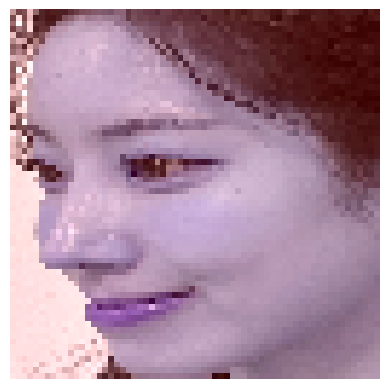

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Grad-CAM 시각화 함수
def display_gradcam(image, model):
    img_array = np.expand_dims(image, axis=0)  # 모델에 맞는 차원으로 확장
    # conv2d_4 또는 conv2d_5를 사용하여 Grad-CAM을 생성
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name='conv2d_5')

    # 히트맵을 원본 이미지 위에 중첩
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    
    # heatmap 값을 0~255 사이로 클리핑
    heatmap = np.uint8(255 * heatmap)
    heatmap = np.clip(heatmap, 0, 255)  # 값이 255를 초과하지 않도록 클리핑
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = heatmap * 0.4 + image
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)  # 값이 0~255를 넘지 않도록 클리핑
    return superimposed_img

# 특정 이미지 사용 (테스트 세트의 첫 번째 이미지를 사용)
img = X_test[0]  # 테스트 세트에서 첫 번째 이미지를 선택
img = (img * 255).astype(np.uint8)  # 이미지를 0~255로 변환 (정규화 해제)

# Grad-CAM 실행 및 시각화
gradcam_result = display_gradcam(img, model)

# 결과 출력
plt.imshow(gradcam_result)
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 179ms/step
Epoch 0: D_loss_real: 0.5847694873809814, D_loss_fake: 0.7188550233840942, G_loss: 0.6775248050689697
1/1 [==============================] - 0s 32ms/step
Epoch 1000: D_loss_real: 0.6447234749794006, D_loss_fake: 59.85003662109375, G_loss: 1.4062976025720664e-24
1/1 [==============================] - 0s 36ms/step
Epoch 2000: D_loss_real: 0.6272261142730713, D_loss_fake: 61.51956558227539, G_loss: 1.0080965673979271e-25
1/1 [==============================] - 0s 30ms/step
Epoch 3000: D_loss_real: 0.5772237777709961, D_loss_fake: 61.00323486328125, G_loss: 2.5426478415422144e-26
1/1 [==============================] - 0s 33ms/step
Epoch 4000: D_loss_real: 0.6115253567695618, D_loss_fake: 60.480712890625, G_loss: 7.495925926504677e-25
1/1 [==============================] - 0s 35ms/step
Epoch 5000: D_loss_real: 0.5965495109558105, D_loss_fake: 59.6575927734375, G_loss: 3.6222083044202445e-26
1/1 [==============================] - 0s 33ms/st

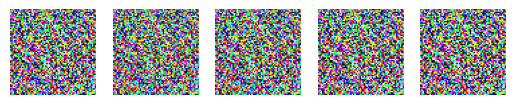

In [16]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# 생성자 모델
def build_generator():
    model = tf.keras.Sequential()
    
    # 입력으로 노이즈 벡터를 받음
    model.add(layers.Dense(256, input_shape=(100,)))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # 은닉층 1
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # 은닉층 2
    model.add(layers.Dense(1024))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # 최종 출력층: 64x64 크기의 이미지 생성 (RGB 채널 = 3)
    model.add(layers.Dense(64 * 64 * 3, activation='tanh'))
    model.add(layers.Reshape((64, 64, 3)))
    
    return model

# 판별자 모델
def build_discriminator():
    model = tf.keras.Sequential()
    
    # 64x64x3 크기의 이미지를 입력으로 받음
    model.add(layers.Flatten(input_shape=(64, 64, 3)))
    
    # 은닉층 1
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # 은닉층 2
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # 출력층: 1개의 값을 반환 (진짜/가짜 구별)
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

# GAN 모델 구축
def build_gan(generator, discriminator):
    discriminator.trainable = False  # 생성자 학습 중에는 판별자는 학습하지 않음
    model = tf.keras.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# 모델 준비
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

# 모델 컴파일
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
gan.compile(loss='binary_crossentropy', optimizer='adam')

# 랜덤 노이즈로부터 이미지 생성
def generate_images(generator, num_images=10):
    noise = np.random.normal(0, 1, (num_images, 100))  # 100 차원의 랜덤 노이즈
    generated_images = generator.predict(noise)
    
    # 생성된 이미지를 시각화
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow((generated_images[i] * 127.5 + 127.5).astype(np.uint8))  # -1~1 값을 0~255로 변환
        plt.axis('off')
    plt.show()

# 훈련 함수
def train_gan(generator, discriminator, gan, epochs=10000, batch_size=32):
    for epoch in range(epochs):
        # 가짜 이미지 생성
        noise = np.random.normal(0, 1, (batch_size, 100))
        generated_images = generator.predict(noise)
        
        # 진짜 이미지와 가짜 이미지 준비
        real_images = np.random.random((batch_size, 64, 64, 3))  # 예시로 랜덤한 실제 이미지 사용
        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))
        
        # 판별자 훈련 (진짜와 가짜 이미지 구별)
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)
        
        # 생성자 훈련
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, real_labels)  # 판별자를 속이도록 생성자 학습
        
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}: D_loss_real: {d_loss_real[0]}, D_loss_fake: {d_loss_fake[0]}, G_loss: {g_loss}")

# GAN 훈련
train_gan(generator, discriminator, gan)

# 학습 후 이미지 생성
generate_images(generator, num_images=5)

# 다시 처음부터 시작

In [ ]:
import numpy as np

# 배치로 이미지 처리
batch_size = 32
batches = [image_paths[i:i+batch_size] for i in range(0, len(image_paths), batch_size)]

for batch in batches:
    images = [cv2.imread(image_path) for image_path in batch]
    # 한 번에 여러 이미지를 처리
    results = [detect_faces(img) for img in images]

In [ ]:
# 딥러닝 기반 MTCNN로 얼굴 인식 및 분류하기
from mtcnn import MTCNN
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# MTCNN 모델 초기화
detector = MTCNN()

# 얼굴이 포함된 이미지만 분리하는 함수
def detect_faces(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR 형식으로 읽기 때문에 RGB로 변환
    
    # MTCNN을 통해 얼굴 탐지
    result = detector.detect_faces(img_rgb)
    
    if result:
        return True  # 얼굴이 있으면 True 반환
    else:
        return False  # 얼굴이 없으면 False 반환

# 데이터셋 경로
dataset_dir = 'D:/py image/na'
output_dir = 'D:/py image/na/output'

# 얼굴 이미지 저장할 디렉토리 생성
os.makedirs(output_dir, exist_ok=True)

# 이미지 파일들을 불러와 얼굴이 있는지 확인하고 분리
for filename in os.listdir(dataset_dir):
    image_path = os.path.join(dataset_dir, filename)
    
    if detect_faces(image_path):
        # 얼굴이 있을 경우, 결과 폴더로 이미지 복사
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, cv2.imread(image_path))
        print(f'Face detected: {filename}')

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# 생성자 모델
def build_generator():
    model = tf.keras.Sequential()
    
    # 입력으로 노이즈 벡터를 받음
    model.add(layers.Dense(256, input_shape=(100,)))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # 은닉층 1
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # 은닉층 2
    model.add(layers.Dense(1024))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # 최종 출력층: 64x64 크기의 이미지 생성 (RGB 채널 = 3)
    model.add(layers.Dense(64 * 64 * 3, activation='tanh'))
    model.add(layers.Reshape((64, 64, 3)))
    
    return model

# 판별자 모델
def build_discriminator():
    model = tf.keras.Sequential()
    
    # 64x64x3 크기의 이미지를 입력으로 받음
    model.add(layers.Flatten(input_shape=(64, 64, 3)))
    
    # 은닉층 1
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # 은닉층 2
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # 출력층: 1개의 값을 반환 (진짜/가짜 구별)
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

# GAN 모델 구축
def build_gan(generator, discriminator):
    discriminator.trainable = False  # 생성자 학습 중에는 판별자는 학습하지 않음
    model = tf.keras.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# 이미지 로드 함수
def load_real_images(output_dir, batch_size):
    image_files = os.listdir(output_dir)
    selected_files = np.random.choice(image_files, batch_size)  # 랜덤하게 배치 크기만큼 선택
    
    images = []
    for file in selected_files:
        img_path = os.path.join(output_dir, file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))  # 이미지 크기를 64x64로 조정
        img = (img / 127.5) - 1.0  # [0, 255] 범위를 [-1, 1]로 정규화
        images.append(img)
    
    return np.array(images)

# 모델 준비
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

# 모델 컴파일
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
gan.compile(loss='binary_crossentropy', optimizer='adam')

# 훈련 함수
def train_gan(generator, discriminator, gan, output_dir, epochs=10000, batch_size=32):
    for epoch in range(epochs):
        # 가짜 이미지 생성
        noise = np.random.normal(0, 1, (batch_size, 100))
        generated_images = generator.predict(noise)
        
        # 진짜 이미지 로드
        real_images = load_real_images(output_dir, batch_size)
        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))
        
        # 판별자 훈련 (진짜와 가짜 이미지 구별)
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)
        
        # 생성자 훈련 (판별자를 속이도록 학습)
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, real_labels)
        
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}: D_loss_real: {d_loss_real[0]}, D_loss_fake: {d_loss_fake[0]}, G_loss: {g_loss}")

# GAN 훈련 (실제 이미지로)
train_gan(generator, discriminator, gan, output_dir='D:/py image/na/output')

# 학습 후 이미지 생성
generate_images(generator, num_images=5)